## Plan : 

   - Nettoyage des données : à faire si corpus intéressant.
   - Tokénisation : OK
   - Statistiques descriptives : OK.
   - Fonction fréquences absolues, relatives : OK
   - Stopwords : OK
   - Barplots, nuages : OK
   - Étiquetage morphosyntaxique
   - ngrams
   - Réseaux
   - CAH
   - Etc.

In [1]:
setwd('~/Desktop/Scenarii_API_BnF/docs_ocr/')

In [2]:
library(dplyr)
library(readr)

list_file <- list.files(recursive = TRUE,
                        pattern = "*.csv", 
                        full.names = TRUE)

list_file


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "./10.csv"  "./100.csv" "./101.csv" "./102.csv" "./103.csv" "./104.csv"
 [7] "./106.csv" "./107.csv" "./109.csv" "./11.csv"  "./111.csv" "./115.csv"
[13] "./116.csv" "./117.csv" "./118.csv" "./12.csv"  "./13.csv"  "./14.csv" 
[19] "./15.csv"  "./16.csv"  "./17.csv"  "./18.csv"  "./19.csv"  "./2.csv"  
[25] "./20.csv"  "./21.csv"  "./22.csv"  "./24.csv"  "./26.csv"  "./27.csv" 
[31] "./28.csv"  "./29.csv"  "./3.csv"   "./30.csv"  "./31.csv"  "./32.csv" 
[37] "./33.csv"  "./34.csv"  "./35.csv"  "./36.csv"  "./37.csv"  "./4.csv"  
[43] "./40.csv"  "./41.csv"  "./42.csv"  "./43.csv"  "./45.csv"  "./46.csv" 
[49] "./47.csv"  "./48.csv"  "./49.csv"  "./5.csv"   "./51.csv"  "./52.csv" 
[55] "./54.csv"  "./56.csv"  "./59.csv"  "./6.csv"   "./60.csv"  "./61.csv" 
[61] "./62.csv"  "./63.csv"  "./65.csv"  "./67.csv"  "./68.csv"  "./69.csv" 
[67] "./7.csv"   "./70.csv"  "./71.csv"  "./72.csv"  "./73.csv"  "./74.csv" 
[73] "./75.csv"  "./76.csv"  "./77.csv"  "./78.csv"  "./79.csv"  "./8.csv"  
[79] "./80.csv"  "./81.csv"  "./82.csv"  "./83.csv"  "./84.csv"  "./85.csv" 
[85] "./86.csv"  "./87.csv"  "./88.csv"  "./89.csv"  "./9.csv"   "./90.csv" 
[91] "./93.csv"  "./94.csv"  "./95.csv"  "./96.csv"  "./97.csv"  "./98.csv" 
[97] "./99.csv"

In [3]:
library('vroom')

list_of_files <- list.files(recursive = TRUE,
                              pattern = "*.csv", 
                              full.names = TRUE)
  
# Lecture :

corpus <- vroom(list_of_files, 
                id = "FileName", 
                delim = ",", 
                col_names = c('identifier', 'entete', 'texteBrut', 'recordId'), 
                progress = TRUE)



Rows: 194
Columns: 5
Delimiter: ","
chr [4]: identifier, entete, texteBrut, recordId

Use `spec()` to retrieve the guessed column specification
Pass a specification to the `col_types` argument to quiet this message


In [4]:
# Vue sur les données : 

str(corpus)

tibble [194 × 5] (S3: tbl_df/tbl/data.frame)
 $ FileName  : chr [1:194] "./10.csv" "./10.csv" "./100.csv" "./100.csv" ...
 $ identifier: chr [1:194] "identifier" "https://gallica.bnf.fr/ark:/12148/bpt6k10407547" "identifier" "https://gallica.bnf.fr/ark:/12148/bpt6k6107926z" ...
 $ entete    : chr [1:194] "entete" "Rappel de votre demande:\nFormat de téléchargement: : Texte\nVues 1 à 65 sur 65\nNombre de pages: 65\nNotice co"| __truncated__ "entete" "Rappel de votre demande:\nFormat de téléchargement: : Texte\nVues 1 à 308 sur 308\nNombre de pages: 308\nNotice"| __truncated__ ...
 $ texteBrut : chr [1:194] "texteBrut" NA "texteBrut" NA ...
 $ recordId  : chr [1:194] "recordId" "10" "recordId" "100" ...
 - attr(*, "spec")=
  .. cols(
  ..   identifier = col_character(),
  ..   entete = col_character(),
  ..   texteBrut = col_character(),
  ..   recordId = col_character()
  .. )


In [5]:
# Sauvegarde du corpus et passage à un autre notebook pour les analyses et les visualisations.

setwd('~/Desktop/Scenarii_API_BnF/')

write.csv(corpus, "corpus_OCR.csv")

In [6]:
## Récupération des métadonnées pour merge : 

works <- read.csv("Metadonnees.csv")

## Récupération des colonnes de works pour récupérer toutes les métadonnées avec l'OCR.

corpus_merge <- merge(corpus, works, on='recordId')

## Vue sur les données : 

str(corpus_merge)

'data.frame':	84 obs. of  20 variables:
 $ identifier : chr  "https://gallica.bnf.fr/ark:/12148/bpt6k1031357" "https://gallica.bnf.fr/ark:/12148/bpt6k10407406" "https://gallica.bnf.fr/ark:/12148/bpt6k10407421" "https://gallica.bnf.fr/ark:/12148/bpt6k1040744v" ...
 $ recordId   : chr  "28" "5" "15" "17" ...
 $ FileName   : chr  "./28.csv" "./5.csv" "./15.csv" "./17.csv" ...
 $ entete     : chr  "Rappel de votre demande:\nFormat de téléchargement: : Texte\nVues 1 à 357 sur 357\nNombre de pages: 357\nNotice"| __truncated__ "Rappel de votre demande:\nFormat de téléchargement: : Texte\nVues 1 à 313 sur 313\nNombre de pages: 313\nNotice"| __truncated__ "Rappel de votre demande:\nFormat de téléchargement: : Texte\nVues 1 à 357 sur 357\nNombre de pages: 357\nNotice"| __truncated__ "Rappel de votre demande:\nFormat de téléchargement: : Texte\nVues 1 à 319 sur 319\nNombre de pages: 319\nNotice"| __truncated__ ...
 $ texteBrut  : chr  NA NA NA NA ...
 $ X          : int  21 4 13 15 9 5 14 25 28 1

In [7]:
# Sauvegarde du corpus complet OCR + Métadonnées :

write.csv(corpus_merge, "Corpus_Meta_OCR.csv")

In [8]:
corpus_merge$entete[1]

[1] "Rappel de votre demande:\nFormat de téléchargement: : Texte\nVues 1 à 357 sur 357\nNombre de pages: 357\nNotice complète:\nTitre : Contes du jour et de la nuit / Guy de Maupassant ; ill. de P. Cousturier\nAuteur : Maupassant, Guy de (1850-1893). Auteur du texte\nÉditeur : (Paris)\nDate d'édition : 1885\nContributeur : Cousturier, P.. Illustrateur\nNotice d'oeuvre : http://catalogue.bnf.fr/ark:/12148/cb16551038t\nNotice du catalogue : http://catalogue.bnf.fr/ark:/12148/cb30910527j\nType : monographie imprimée\nLangue : français\nLangue : Français\nFormat : 1 vol. (354 p.-[1] f. de front.) : ill., couv. ill. ; in-12\nFormat : Nombre total de vues : 357\nDescription : [Contes du jour et de la nuit (français)]\nDroits : Consultable en ligne\nDroits : Public domain\nIdentifiant : ark:/12148/bpt6k1031357\nSource : Bibliothèque nationale de France, département Littérature et art, 8-Y2-7818\nProvenance : Bibliothèque nationale de France\nDate de mise en ligne : 15/10/2007\nLe texte affiché peut comporter un certain nombre d'erreurs. En effet, le mode texte de ce document a été généré de façon automatique par un programme de reconnaissance optique de caractères (OCR). Le taux de reconnaissance estimé pour ce document est de 91%.\nIllisibilité partielle \nRELIURE SERRÉE \nABSENCE DE MARGES INTERIEURES \nVALABLE POUR TOUT OU PARTIE DU DOCUMENT REPRODUIT \nPhoto. K.Bkknaud et Cie. Païis. \nCONTES \nDU JOUR ET DE LA NUIT \nIl a été tiré de eet ouvrage 50 exemplaires sur papier de Hollande, tous numérotés. \nOUVRAGES DU MÊME AUTEUR \nDES VERS. \nLA MAISON TELLIEP,. \nMADEMOISELLE FIFI. \nUNE VIF,. \nLES CONTES DE LA BECASSK. \nCLAIR DE LUNE. \nAU SOLEIL. \nMISS HARRIETT. \nLES SOEURS ROKDOI.I. VVETTE. \nFAA1S. 1UP. C. MARFON ET B. FLAMMARION, RUE RACINE, 26. \nGUY DE MAUPASSANT \nCONTES \nDU \nJOUR ET DE LA NUIT \nIllustrations de P. Cousturier \nPARIS \nC. MAHP0N ET E. FLAMMARION ÉDITEURS \n9S, RUE RACINE, PRÈS L'ODÉON \nTous droits réservés. \nLE CRIME \nAU \nPÈRE BONIFACE \nCe jour-là le facteur Boniface, en sortant de la maison de .poste, constata que sa tournée serait moins longue que de coûtunie, et il en ressentit une joie vive. Il était chargé de la campagne autour du bourg de Vireville; et, quand il revenait, le soir, de son long pas fatigué, il avait parfois plus de quarante kilômètres dans les jambes. \nDonc la distribution serait vite faite; il pour. rait même flâner un peu en route et rentrer chez lui vers trois heures de relevée. Quelle chance! \nIl sortit du bourg par le chemin de Sennemare et commença sa besogne. ,On était en juin, dans le mois vert et ffeuri, le vrai mois des plaines. \nL'homme, vêtu de sa blouse bleue et coiffé d'un képi noir à galon rouge, traversait par des sentiers étroits les champs de colza, d'avoine ou de blé, enseveli jusqu'aux épaules dans les récoltes et sa tête, passant au-dessus des épis, semblait flotter sur une mer calme et verdoyante qu'une brise légère faisait mollement onduler. Il entrait dans les fermes par là barrière de bois plantée dans les talus qu'ombrageaient deux rangées de hêtres, et saluant par son nom le paysan « Bonjour, malt' Chicot, il lui tendait son journal le Petit Normand. Le fermier essuyait sa main à son fond de culotte, recevait la feuille de papier et la glissait dans \nsa poche pour la lire à son aise après le repas de midi. Le chien, logé dans un baril, au pied d'un pommier penchant, jappait avec fureur en tirant sur sa cha2ne et le piéton, sans se retourner, repartait de son allure militaire, en allongeant ses grandes jambes, le bras gauche sur sa sacoche, et le droit manoeuvrant sur sa canne qui marchait comme lui d'une façon continue et pressée. \nIl distribua ses imprimés et ses lettres dans le hameau de Sennemare, puis il se remit en route à travers champs pour porter le courrier du percepteur qui habitait une petite maison isolée à un kilomètre du bourg. \nC'était un nouveau percepteur, M. Chapatis, arrivé la semaine dernière, et marié depuispeu. Il receva

In [9]:
## Regex : 

library("stringr")
library('dplyr')

corpus_clean <- corpus_merge

## Suppression des retours chariots :

corpus_clean$entete <- str_replace_all(corpus_clean$entete, "\\n", " ")

## Vérification : 

corpus_clean$entete[1]

[1] "Rappel de votre demande: Format de téléchargement: : Texte Vues 1 à 357 sur 357 Nombre de pages: 357 Notice complète: Titre : Contes du jour et de la nuit / Guy de Maupassant ; ill. de P. Cousturier Auteur : Maupassant, Guy de (1850-1893). Auteur du texte Éditeur : (Paris) Date d'édition : 1885 Contributeur : Cousturier, P.. Illustrateur Notice d'oeuvre : http://catalogue.bnf.fr/ark:/12148/cb16551038t Notice du catalogue : http://catalogue.bnf.fr/ark:/12148/cb30910527j Type : monographie imprimée Langue : français Langue : Français Format : 1 vol. (354 p.-[1] f. de front.) : ill., couv. ill. ; in-12 Format : Nombre total de vues : 357 Description : [Contes du jour et de la nuit (français)] Droits : Consultable en ligne Droits : Public domain Identifiant : ark:/12148/bpt6k1031357 Source : Bibliothèque nationale de France, département Littérature et art, 8-Y2-7818 Provenance : Bibliothèque nationale de France Date de mise en ligne : 15/10/2007 Le texte affiché peut comporter un certain nombre d'erreurs. En effet, le mode texte de ce document a été généré de façon automatique par un programme de reconnaissance optique de caractères (OCR). Le taux de reconnaissance estimé pour ce document est de 91%. Illisibilité partielle  RELIURE SERRÉE  ABSENCE DE MARGES INTERIEURES  VALABLE POUR TOUT OU PARTIE DU DOCUMENT REPRODUIT  Photo. K.Bkknaud et Cie. Païis.  CONTES  DU JOUR ET DE LA NUIT  Il a été tiré de eet ouvrage 50 exemplaires sur papier de Hollande, tous numérotés.  OUVRAGES DU MÊME AUTEUR  DES VERS.  LA MAISON TELLIEP,.  MADEMOISELLE FIFI.  UNE VIF,.  LES CONTES DE LA BECASSK.  CLAIR DE LUNE.  AU SOLEIL.  MISS HARRIETT.  LES SOEURS ROKDOI.I. VVETTE.  FAA1S. 1UP. C. MARFON ET B. FLAMMARION, RUE RACINE, 26.  GUY DE MAUPASSANT  CONTES  DU  JOUR ET DE LA NUIT  Illustrations de P. Cousturier  PARIS  C. MAHP0N ET E. FLAMMARION ÉDITEURS  9S, RUE RACINE, PRÈS L'ODÉON  Tous droits réservés.  LE CRIME  AU  PÈRE BONIFACE  Ce jour-là le facteur Boniface, en sortant de la maison de .poste, constata que sa tournée serait moins longue que de coûtunie, et il en ressentit une joie vive. Il était chargé de la campagne autour du bourg de Vireville; et, quand il revenait, le soir, de son long pas fatigué, il avait parfois plus de quarante kilômètres dans les jambes.  Donc la distribution serait vite faite; il pour. rait même flâner un peu en route et rentrer chez lui vers trois heures de relevée. Quelle chance!  Il sortit du bourg par le chemin de Sennemare et commença sa besogne. ,On était en juin, dans le mois vert et ffeuri, le vrai mois des plaines.  L'homme, vêtu de sa blouse bleue et coiffé d'un képi noir à galon rouge, traversait par des sentiers étroits les champs de colza, d'avoine ou de blé, enseveli jusqu'aux épaules dans les récoltes et sa tête, passant au-dessus des épis, semblait flotter sur une mer calme et verdoyante qu'une brise légère faisait mollement onduler. Il entrait dans les fermes par là barrière de bois plantée dans les talus qu'ombrageaient deux rangées de hêtres, et saluant par son nom le paysan « Bonjour, malt' Chicot, il lui tendait son journal le Petit Normand. Le fermier essuyait sa main à son fond de culotte, recevait la feuille de papier et la glissait dans  sa poche pour la lire à son aise après le repas de midi. Le chien, logé dans un baril, au pied d'un pommier penchant, jappait avec fureur en tirant sur sa cha2ne et le piéton, sans se retourner, repartait de son allure militaire, en allongeant ses grandes jambes, le bras gauche sur sa sacoche, et le droit manoeuvrant sur sa canne qui marchait comme lui d'une façon continue et pressée.  Il distribua ses imprimés et ses lettres dans le hameau de Sennemare, puis il se remit en route à travers champs pour porter le courrier du percepteur qui habitait une petite maison isolée à un kilomètre du bourg.  C'était un nouveau percepteur, M. Chapatis, arrivé la semaine dernière, et marié depuispeu. Il recevait un journal de Paris, et, parfois, le facteur Boniface, quan

In [35]:
## Suppression de l'en-tête

### Tout ce qui va de "Rappel de votre demande" à "Tous droits réservés"
#### Regex : <Rappel de votre demande:\\nFormat de téléchargement:.*Tous droits réservés>

corpus_clean$entete <- str_replace_all(corpus_clean$entete, "Rappel de votre demande.*Tous droits réservés","")
corpus_clean$entete <- str_replace_all(corpus_clean$entete, "Rappel de votre demande.*Droits de traduction et de reproduction réservés","")
corpus_clean$entete <- str_replace_all(corpus_clean$entete, "Rappel de votre demande.*Le taux de reconnaissance estimé pour ce document est de","")

## Vérification : 

corpus_clean$entete[1]


[1] ".  LE CRIME  AU  PÈRE BONIFACE  Ce jour-là le facteur Boniface, en sortant de la maison de .poste, constata que sa tournée serait moins longue que de coûtunie, et il en ressentit une joie vive. Il était chargé de la campagne autour du bourg de Vireville; et, quand il revenait, le soir, de son long pas fatigué, il avait parfois plus de quarante kilômètres dans les jambes.  Donc la distribution serait vite faite; il pour. rait même flâner un peu en route et rentrer chez lui vers trois heures de relevée. Quelle chance!  Il sortit du bourg par le chemin de Sennemare et commença sa besogne. ,On était en juin, dans le mois vert et ffeuri, le vrai mois des plaines.  L'homme, vêtu de sa blouse bleue et coiffé d'un képi noir à galon rouge, traversait par des sentiers étroits les champs de colza, d'avoine ou de blé, enseveli jusqu'aux épaules dans les récoltes et sa tête, passant au-dessus des épis, semblait flotter sur une mer calme et verdoyante qu'une brise légère faisait mollement onduler. Il entrait dans les fermes par là barrière de bois plantée dans les talus qu'ombrageaient deux rangées de hêtres, et saluant par son nom le paysan « Bonjour, malt' Chicot, il lui tendait son journal le Petit Normand. Le fermier essuyait sa main à son fond de culotte, recevait la feuille de papier et la glissait dans  sa poche pour la lire à son aise après le repas de midi. Le chien, logé dans un baril, au pied d'un pommier penchant, jappait avec fureur en tirant sur sa cha2ne et le piéton, sans se retourner, repartait de son allure militaire, en allongeant ses grandes jambes, le bras gauche sur sa sacoche, et le droit manoeuvrant sur sa canne qui marchait comme lui d'une façon continue et pressée.  Il distribua ses imprimés et ses lettres dans le hameau de Sennemare, puis il se remit en route à travers champs pour porter le courrier du percepteur qui habitait une petite maison isolée à un kilomètre du bourg.  C'était un nouveau percepteur, M. Chapatis, arrivé la semaine dernière, et marié depuispeu. Il recevait un journal de Paris, et, parfois, le facteur Boniface, quand il avait le temps, jetait un coup d'œil sur l'imprimé, avant de le remettre au destinataire.  Donc, il ouvrit sa sacoche, prit la feuille, la fit glisser hors de sa bande, la déplia, et se mit à lire tout en marchant. La première page ne 1  l'intéressait guère la politique le laissait froid il passait toujours la finance, mais les faits-divers le passionnaient.  Ils étaient très nourris ce jour-là. Il s'émut même si vivement au récit d'un crime accompli dans le logis d'un garde-chasse, qu'il s'arrêta au milieu d'une pièce de trèfle, pour le relire lentement. Les détails étaient affreux. Un bûcheron, en passant au matin auprès de la maison forestière, avait remarqué un peu de sang sur le seuil, comme si on avait saigné du nez. « Le garde aura tué quelque lapin cette nuit, » pensa-t-il;,mais en approchant il s'aperçut que la porte demeurait entr'ouverte et que la serrure avait été brisée.  Alors, saisi de peur, il courut au village prévenir le maire, celui-ci prit comme renfort le garde champêtre et l'instituteur et les quatre hommes revinrent ensemble. Ils trouvèrent le forestier égorgé devant la cheminée, sa femme étranglée sous le lit, et leur petite fille, âgée de six ans, étouffée entre deux matelas.  Le facteur Boniface demeura tellement ému à la pensée de cet assassinat dont toutes les horribles circonstances lui apparaissaient coup sur coup, qu'il se sentit une faiblesse dans les jambes, et il prononça tout haut  Nom de nom, y a-t-il tout de même des gens qui sont canaille  Puis il repassa le journal dans sa ceinture de papier et repartit, la tête pleine de la visondu crime. Il atteignit bientôt la demeure de M. Chapatis il ouvrit la barrière du petit jardin et s'approcha de la maison. C'était une construction basse,. ne contenant qu'un rezde-chaussée, coiffé d'un toit mansardé. Elle était éloignée de cinq cents mètres au moins de la maison la plus voisine.  Le facteur 

In [11]:
# Correction apostrophes :
  
corpus_clean = corpus_clean %>%
    mutate(entete = stringr::str_replace_all(.$entete, "’", "'")) %>%
    mutate(entete = stringr::str_replace_all(.$entete, "'", "'")) %>%
    mutate(entete = stringr::str_replace_all(.$entete, "`", "'")) %>%
    mutate(FileName = stringr::str_replace_all(.$FileName, "\\.\\/", "")) # Correction de l'identifiant : retrait "./" au début :

---
## Focus sur certaines métadonnées exploitables :

   - Dates.
   - Contributors.

---

### Dates :

In [12]:
## Extraction et dénombrement des dates :

# corpus_clean$

corpus_dates <- corpus_clean %>%
    count(date, sort = FALSE)

head(corpus_dates)

date n
1 1880 1
2 1881 1
3 1882 1
4 1883 6
5 1884 6
6 1885 8

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

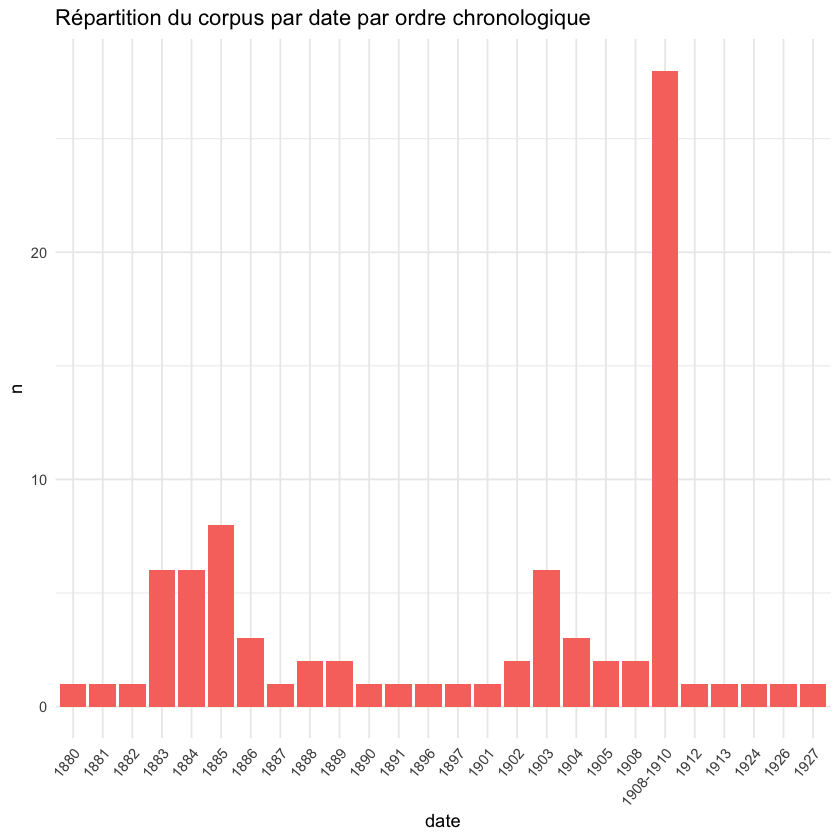

In [13]:
library("ggplot2")

## Visualisation des distributions au niveau des dates : 

plot_frequence <- ggplot(data = corpus_dates,
                         aes(x = date, y = n, fill = "#3F93C1")) +
  geom_histogram(stat = "identity", position = "dodge", show.legend = F) + 
  theme_minimal() +
  theme(legend.position="right")

plot_frequence + theme(axis.text.x= element_text(angle = 50, hjust = 1)) + 
labs(title = "Répartition du corpus par date par ordre chronologique")

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

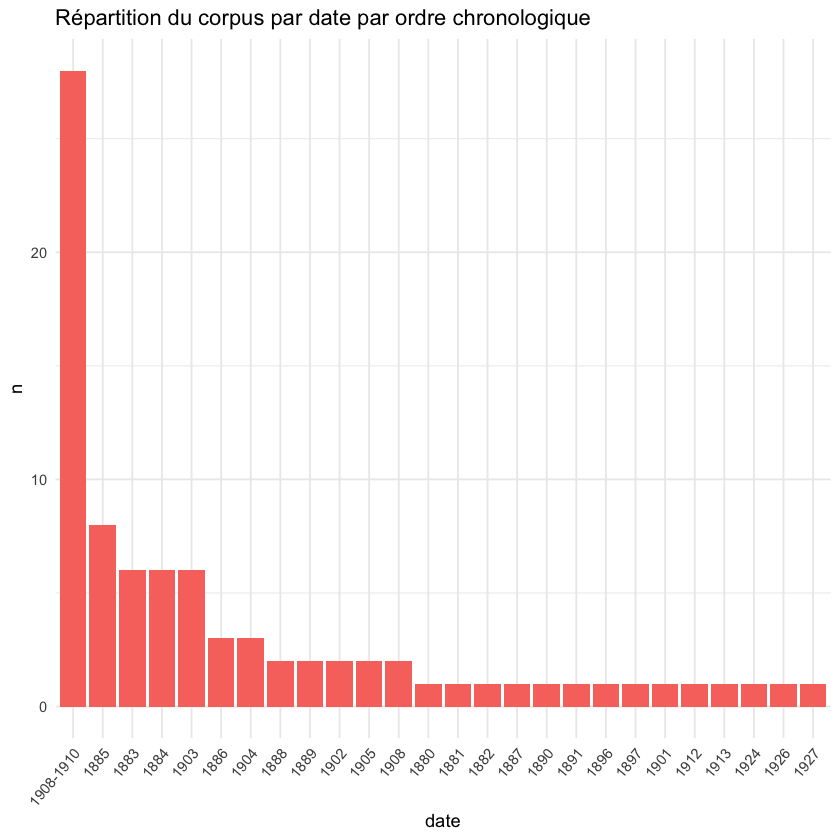

In [14]:
## Par fréquence : 

corpus_dates <- corpus_clean %>%
    count(date, sort = TRUE)

#Turn your 'treatment' column into a character vector
corpus_dates$date <- as.character(corpus_dates$date)
#Then turn it back into a factor with the levels in the correct order
corpus_dates$date <- factor(corpus_dates$date, levels=unique(corpus_dates$date))

plot_frequence <- ggplot(data = corpus_dates,
                         aes(x = date, y = n, fill = "#3F93C1")) +
  geom_histogram(stat = "identity", position = "dodge", show.legend = F) + 
  theme_minimal() +
  theme(legend.position="right")

plot_frequence + theme(axis.text.x= element_text(angle = 50, hjust = 1)) + 
labs(title = "Répartition du corpus par date par ordre chronologique")

In [15]:
## Analyse de la valeur aberrante 1908-1910 évidemment : à quoi cela correspond ?
## Est-ce une erreur ? Des doublons ?
## Interprétation et retour aux textes...
## Pas l'objet ici. 

### Contributeurs :

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

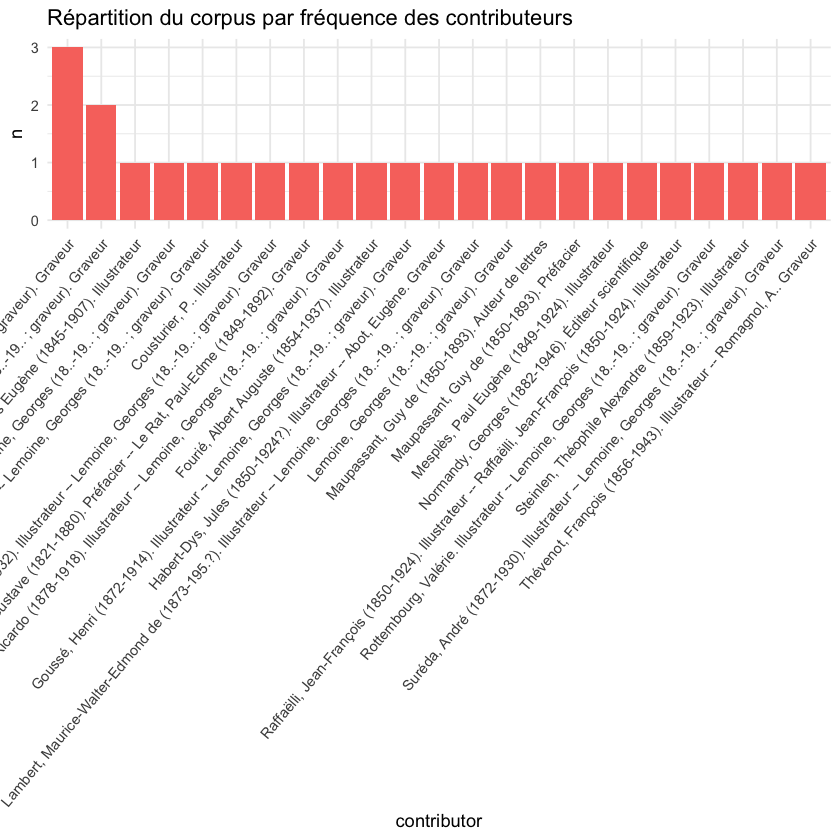

In [16]:
## Extraction et dénombrement des dates :

# corpus_clean$

corpus_contributors <- corpus_clean %>%
    count(contributor, sort = TRUE)

# Retrait de la valeur vide :

corpus_contributors <- corpus_contributors[-1,]

#Turn your 'treatment' column into a character vector
corpus_contributors$contributor <- as.character(corpus_contributors$contributor)
#Then turn it back into a factor with the levels in the correct order
corpus_contributors$contributor <- factor(corpus_contributors$contributor, levels=unique(corpus_contributors$contributor))

library("ggplot2")

## Visualisation des distributions au niveau des dates : 

plot_frequence <- ggplot(data = corpus_contributors,
                         aes(x = contributor, y = n, fill = "#3F93C1")) +
  geom_histogram(stat = "identity", position = "dodge", show.legend = F) + 
  theme_minimal() +
  theme(legend.position="right")

plot_frequence + theme(axis.text.x= element_text(angle = 50, hjust = 1)) + 
labs(title = "Répartition du corpus par fréquence des contributeurs")

In [17]:
## Ok, ça marche moins bien dans ce cas-là.

---

## Tokénisation :

   - On veut pouvoir avoir un mot par cellule pour pouvoir faire des analyses stats sur les données.

---

In [18]:
# Dans le terminal : conda install -c r r-tidytext
# Update index

In [19]:
# Tokénisation :

library("tidyverse")
library("tidytext")

corpus_clean_tok = corpus_clean %>%
  unnest_tokens(mots, entete, to_lower = FALSE)

head(corpus_clean_tok)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ tibble  3.0.4     ✔ purrr   0.3.4
✔ tidyr   1.1.2     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ vroom::col_character()  masks readr::col_character()
✖ vroom::col_date()       masks readr::col_date()
✖ vroom::col_datetime()   masks readr::col_datetime()
✖ vroom::col_double()     masks readr::col_double()
✖ vroom::col_factor()     masks readr::col_factor()
✖ vroom::col_guess()      masks readr::col_guess()
✖ vroom::col_integer()    masks readr::col_integer()
✖ vroom::col_logical()    masks readr::col_logical()
✖ vroom::col_number()     masks readr::col_number()
✖ vroom::col_skip()       masks readr::col_skip()
✖ vroom::col_time()       masks readr::col_time()
✖ vroom::cols()           masks readr::cols()
✖ vroom::default_locale() masks readr::default_locale()
✖ dplyr::filter()         masks stats::filter()
✖ vroom::fwf_empty()      masks readr::fwf_e

identifier                                     recordId FileName texteBrut
1   https://gallica.bnf.fr/ark:/12148/bpt6k1031357 28       28.csv   NA       
1.1 https://gallica.bnf.fr/ark:/12148/bpt6k1031357 28       28.csv   NA       
1.2 https://gallica.bnf.fr/ark:/12148/bpt6k1031357 28       28.csv   NA       
1.3 https://gallica.bnf.fr/ark:/12148/bpt6k1031357 28       28.csv   NA       
1.4 https://gallica.bnf.fr/ark:/12148/bpt6k1031357 28       28.csv   NA       
1.5 https://gallica.bnf.fr/ark:/12148/bpt6k1031357 28       28.csv   NA       
    X  contributor                 
1   21 Cousturier, P.. Illustrateur
1.1 21 Cousturier, P.. Illustrateur
1.2 21 Cousturier, P.. Illustrateur
1.3 21 Cousturier, P.. Illustrateur
1.4 21 Cousturier, P.. Illustrateur
1.5 21 Cousturier, P.. Illustrateur
    creator                                         date
1   Maupassant, Guy de (1850-1893). Auteur du texte 1885
1.1 Maupassant, Guy de (1850-1893). Auteur du texte 1885
1.2 Maupassant, Guy de (1850-1893). Auteur du texte 1885
1.3 Maupassant, Guy de (1850-1893). Auteur du texte 1885
1.4 Maupassant, Guy de (1850-1893). Auteur du texte 1885
1.5 Maupassant, Guy de (1850-1893). Auteur du texte 1885
    description                              
1   [Contes du jour et de la nuit (français)]
1.1 [Contes du jour et de la nuit (français)]
1.2 [Contes du jour et de la nuit (français)]
1.3 [Contes du jour et de la nuit (français)]
1.4 [Contes du jour et de la nuit (français)]
1.5 [Contes du jour et de la nuit (français)]
    format                                                                                   
1   1 vol. (354 p.-[1] f. de front.) : ill., couv. ill. ; in-12 -- Nombre total de vues : 357
1.1 1 vol. (354 p.-[1] f. de front.) : ill., couv. ill. ; in-12 -- Nombre total de vues : 357
1.2 1 vol. (354 p.-[1] f. de front.) : ill., couv. ill. ; in-12 -- Nombre total de vues : 357
1.3 1 vol. (354 p.-[1] f. de front.) : ill., couv. ill. ; in-12 -- Nombre total de vues : 357
1.4 1 vol. (354 p.-[1] f. de front.) : ill., couv. ill. ; in-12 -- Nombre total de vues : 357
1.5 1 vol. (354 p.-[1] f. de front.) : ill., couv. ill. ; in-12 -- Nombre total de vues : 357
    language        publisher
1   fre -- français  (Paris) 
1.1 fre -- français  (Paris) 
1.2 fre -- français  (Paris) 
1.3 fre -- français  (Paris) 
1.4 fre -- français  (Paris) 
1.5 fre -- français  (Paris) 
    relation                                                                                                                                
1   Notice d’oeuvre : http://catalogue.bnf.fr/ark:/12148/cb16551038t -- Notice du catalogue : http://catalogue.bnf.fr/ark:/12148/cb30910527j
1.1 Notice d’oeuvre : http://catalogue.bnf.fr/ark:/12148/cb16551038t -- Notice du catalogue : http://catalogue.bnf.fr/ark:/12148/cb30910527j
1.2 Notice d’oeuvre : http://catalogue.bnf.fr/ark:/12148/cb16551038t -- Notice du catalogue : http://catalogue.bnf.fr/ark:/12148/cb30910527j
1.3 Notice d’oeuvre : http://catalogue.bnf.fr/ark:/12148/cb16551038t -- Notice du catalogue : http://catalogue.bnf.fr/ark:/12148/cb30910527j
1.4 Notice d’oeuvre : http://catalogue.bnf.fr/ark:/12148/cb16551038t -- Notice du catalogue : http://catalogue.bnf.fr/ark:/12148/cb30910527j
1.5 Notice d’oeuvre : http://catalogue.bnf.fr/ark:/12148/cb16551038t -- Notice du catalogue : http://catalogue.bnf.fr/ark:/12148/cb30910527j
    rights                         
1   domaine public -- public domain
1.1 domaine public -- public domain
1.2 domaine public -- public domain
1.3 domaine public -- public domain
1.4 domaine public -- public domain
1.5 domaine public -- public domain
    source                                                                     
1   Bibliothèque nationale de France, département Littérature et art, 8-Y2-7818
1.1 Bibliothèque nationale de France, département Littérature et art, 8-Y2-7818
1.2 Bibliothèque nationale de France, département Littérature et art, 8-Y2-7818
1.3 Bibliothèque nationale de France, département L

In [20]:
nrow(corpus_clean_tok)

# 4 053 311.

[1] 4053311

In [21]:
# Aperçu de la tokénisation : 

corpus_clean_tok$mots[1:100]

[1] "LE"           "CRIME"        "AU"           "PÈRE"         "BONIFACE"    
  [6] "Ce"           "jour"         "là"           "le"           "facteur"     
 [11] "Boniface"     "en"           "sortant"      "de"           "la"          
 [16] "maison"       "de"           "poste"        "constata"     "que"         
 [21] "sa"           "tournée"      "serait"       "moins"        "longue"      
 [26] "que"          "de"           "coûtunie"     "et"           "il"          
 [31] "en"           "ressentit"    "une"          "joie"         "vive"        
 [36] "Il"           "était"        "chargé"       "de"           "la"          
 [41] "campagne"     "autour"       "du"           "bourg"        "de"          
 [46] "Vireville"    "et"           "quand"        "il"           "revenait"    
 [51] "le"           "soir"         "de"           "son"          "long"        
 [56] "pas"          "fatigué"      "il"           "avait"        "parfois"     
 [61] "plus"         "de"           "quarante"     "kilômètres"   "dans"        
 [66] "les"          "jambes"       "Donc"         "la"           "distribution"
 [71] "serait"       "vite"         "faite"        "il"           "pour"        
 [76] "rait"         "même"         "flâner"       "un"           "peu"         
 [81] "en"           "route"        "et"           "rentrer"      "chez"        
 [86] "lui"          "vers"         "trois"        "heures"       "de"          
 [91] "relevée"      "Quelle"       "chance"       "Il"           "sortit"      
 [96] "du"           "bourg"        "par"          "le"           "chemin"

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

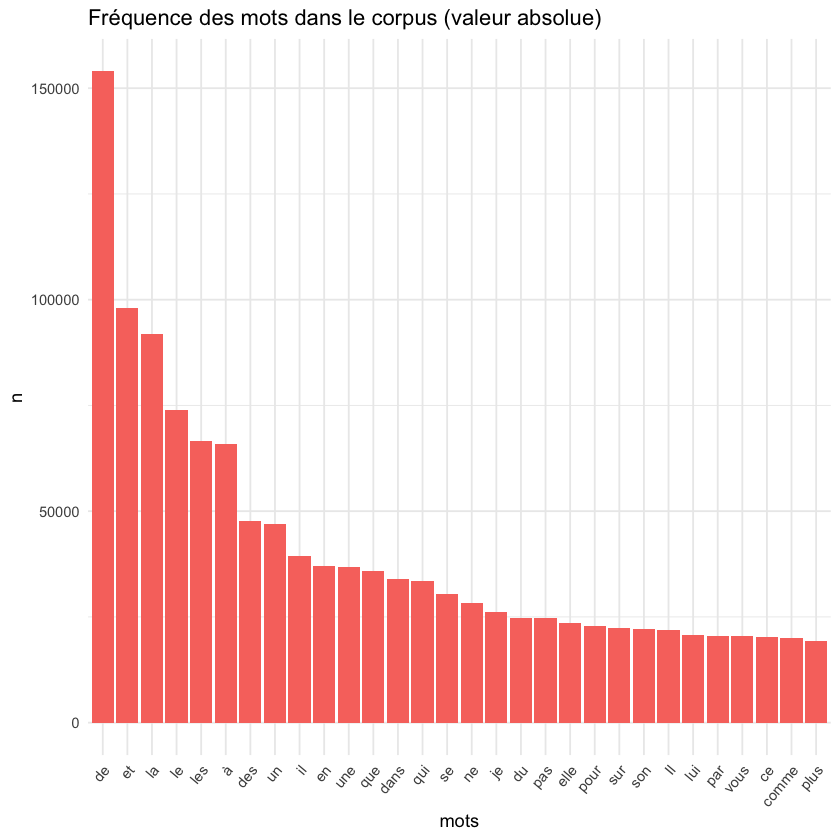

In [22]:
## Dénombrement et visualisation : 

count_tok <- corpus_clean_tok %>%
    count(mots, sort = TRUE)

#Turn your 'treatment' column into a character vector
count_tok$mots <- as.character(count_tok$mots)
#Then turn it back into a factor with the levels in the correct order
count_tok$mots <- factor(count_tok$mots, levels=unique(count_tok$mots))

## Visualisation des distributions au niveau des dates : 

plot_count_toks <- ggplot(data = count_tok[1:30,],
                         aes(x = mots, y = n, fill = "#3F93C1")) +
  geom_histogram(stat = "identity", position = "dodge", show.legend = F) + 
  theme_minimal() +
  theme(legend.position="right")

plot_count_toks + theme(axis.text.x= element_text(angle = 50, hjust = 1)) + 
labs(title = "Fréquence des mots dans le corpus (valeur absolue)")

## Interprétation : 

   - Majoritairement des mots-outils que l'on souhaiterait retirer.
   - Retrait des majuscules.

In [23]:
setwd('~/Desktop/Scenarii_API_BnF/')

# Retrait des majuscules : 

corpus_clean_tok_maj <- corpus_clean %>%
  unnest_tokens(mots, entete, to_lower = TRUE)



Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

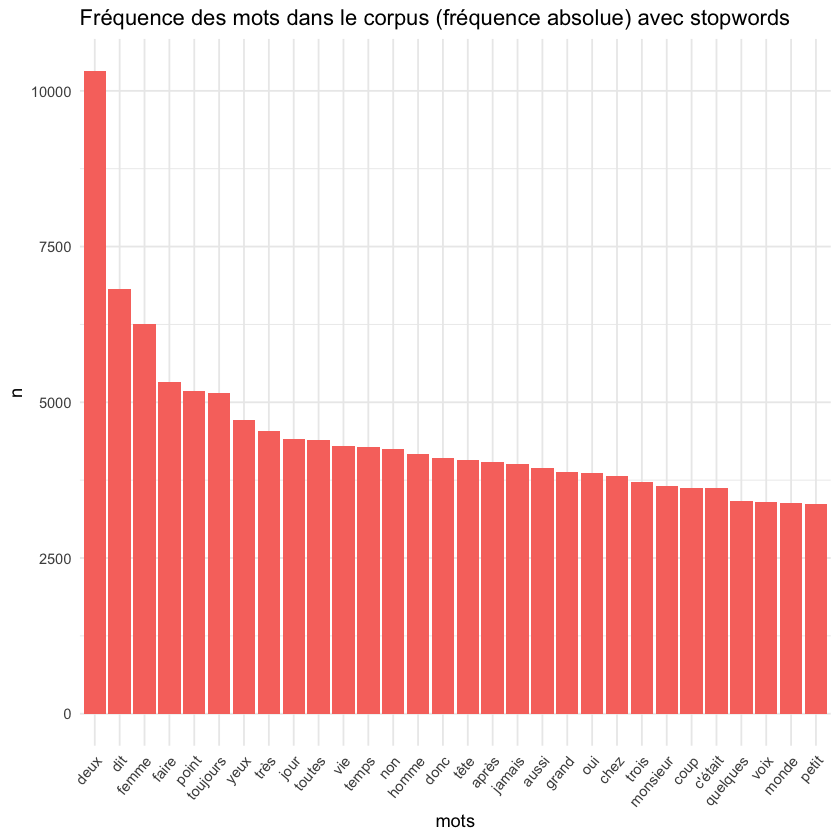

In [24]:
# Count : 

count_tok <- corpus_clean_tok_maj %>%
    count(mots, sort = TRUE)

# Retrait des stopwords : 

stopwords_list = scan("stopwords.txt", what = "character") # 186 items

# Implémentation de stopwords :

count_tok_stpwds <- count_tok %>%
  filter(!mots %in% stopwords_list)

#Turn your 'treatment' column into a character vector
count_tok_stpwds$mots <- as.character(count_tok_stpwds$mots)
#Then turn it back into a factor with the levels in the correct order
count_tok_stpwds$mots <- factor(count_tok_stpwds$mots, levels=unique(count_tok_stpwds$mots))

plot_count_stpwd <- ggplot(data = count_tok_stpwds[1:30,],
                         aes(x = mots, y = n, fill = "#CD0037")) +
  geom_histogram(stat = "identity", position = "dodge", show.legend = F) + 
  theme_minimal() +
  theme(legend.position="right")

plot_count_stpwd + theme(axis.text.x= element_text(angle = 50, hjust = 1)) + 
    labs(title = "Fréquence des mots dans le corpus (fréquence absolue) avec stopwords")

Warning message:
“package ‘wordcloud’ was built under R version 3.6.3”Loading required package: RColorBrewer


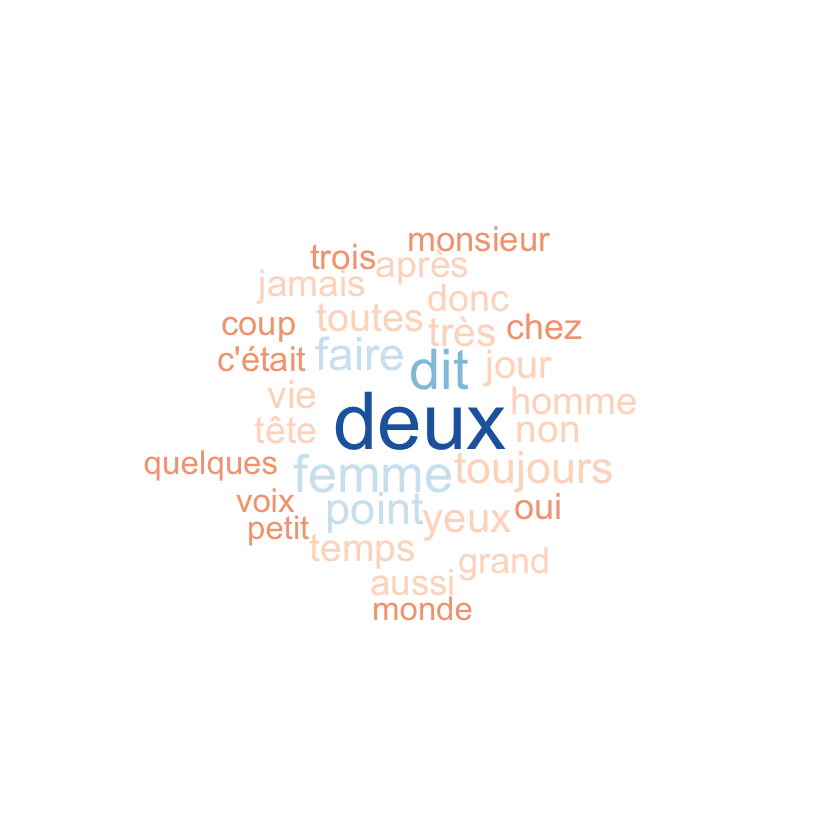

In [25]:
# Autre visualisation en nuage de mots : 

library("wordcloud") # conda install -c conda-forge r-ggwordcloud
library("RColorBrewer") # conda install -c r r-rcolorbrewer 
#library("reshape2")
#library("ggsci")

wordcloud(count_tok_stpwds$mots, count_tok_stpwds$n, max.words = 30, random.order = FALSE, 
          rot.per = F, colors= c("#B2182B", "#D6604D", "#F4A582", "#FDDBC7", 
                                 "#D1E5F0", "#92C5DE", "#4393C3", "#2166AC"))


In [26]:
## En fréquence relative : 

## Dénombrement + filtrage éventuel des données : ex : n > 10
corpus_rel <- corpus_clean %>%
    unnest_tokens(mots, entete, to_lower = TRUE) %>%
    count(title, mots, sort = TRUE)
  
head(corpus_rel)

title                                                                                                                                                                                                                     
1 Souvenirs sur Maupassant, sa dernière maladie, sa mort : avec des lettres inédites communiquées par Madame Laure de Maupassant, et des notes recueillies parmi les amis et les médecins de l'écrivain... / Albert Lumbroso
2 Oeuvres complètes de Gustave Flaubert.... Tome 2                                                                                                                                                                          
3 Oeuvres complètes de Gustave Flaubert.... Tome 2                                                                                                                                                                          
4 Souvenirs sur Maupassant, sa dernière maladie, sa mort : avec des lettres inédites communiquées par Madame Laure de Maupassant, et des notes recueillies parmi les amis et les médecins de l'écrivain... / Albert Lumbroso
5 Oeuvres complètes de Guy de Maupassant.... 13                                                                                                                                                                             
6 Oeuvres complètes de Gustave Flaubert.... Tome 6                                                                                                                                                                          
  mots n   
1 de   8285
2 les  4420
3 de   4406
4 la   4311
5 de   4194
6 de   3854

In [27]:
## Ajout d'une colonne total words pour normaliser la fréquence (fréquence relative) :
  
total_words <- corpus_rel %>%
    group_by(title) %>%
    summarize(total = sum(n))
  
corpus_words_rel <- left_join(corpus_rel, total_words, by = "title") 
  
## Calcul de la fréquence relative :

corpus_words_rel$rel_freq <- corpus_words_rel$n / corpus_words_rel$total
  
# Ordonnancement par fréquences relatives :
corpus_words_rel <- corpus_words_rel[order(corpus_words_rel$rel_freq, decreasing = T),] 

head(corpus_words_rel)

`summarise()` ungrouping output (override with `.groups` argument)


title                                                                                                                                                                                                                     
42   Les Tireurs au pistolet. Préface par Guy de Maupassant. Lettre du prince Georges Bibesco. [Lettre du Bon Charles de Mayréna.] / Bon de Vaux                                                                               
1    Souvenirs sur Maupassant, sa dernière maladie, sa mort : avec des lettres inédites communiquées par Madame Laure de Maupassant, et des notes recueillies parmi les amis et les médecins de l'écrivain... / Albert Lumbroso
2009 Émile Zola / par Guy de Maupassant ; [couv. ill. par P. Avril] ; [portrait d'Émile Zola par Burney]                                                                                                                       
68   Anthologie des auteurs modernes. V, Recueil de morceaux choisis / Guy de Maupassant ; précédé d'une étude... par Georges Normandy...                                                                                      
36   Oeuvres complètes de Guy de Maupassant.... 24                                                                                                                                                                             
83   Oeuvres complètes illustrées de Guy de Maupassant. 21, Théâtre ; La paix du ménage ; Musotte ; Histoire du vieux temps / Guy de Maupassant ; dessins de H. Goussé ; gravure sur bois de G. Lemoine                        
     mots n    total  rel_freq  
42   de   2263  42576 0.05315201
1    de   8285 157179 0.05271060
2009 de    267   5276 0.05060652
68   de   1921  38469 0.04993631
36   de   2451  49474 0.04954117
83   de   1750  35786 0.04890181

In [28]:
count_rel <- corpus_words_rel %>%
  filter(!mots %in% stopwords_list)

# Ordonnancement par fréquences relatives :
count_rel <- count_rel[order(count_rel$rel_freq, decreasing = T),] 

#Turn your 'treatment' column into a character vector
count_rel$mots <- as.character(count_rel$mots)
#Then turn it back into a factor with the levels in the correct order
count_rel$mots <- factor(count_rel$mots, levels=unique(count_rel$mots))

count_rel[1:100,]

title                                                                                                                                                                                                                     
1   Oeuvres complètes illustrées de Guy de Maupassant. 21, Théâtre ; La paix du ménage ; Musotte ; Histoire du vieux temps / Guy de Maupassant ; dessins de H. Goussé ; gravure sur bois de G. Lemoine                        
2   Oeuvres complètes de Guy de Maupassant.... 27                                                                                                                                                                             
3   Oeuvres complètes illustrées de Guy de Maupassant. 21, Théâtre ; La paix du ménage ; Musotte ; Histoire du vieux temps / Guy de Maupassant ; dessins de H. Goussé ; gravure sur bois de G. Lemoine                        
4   Souvenirs sur Maupassant, sa dernière maladie, sa mort : avec des lettres inédites communiquées par Madame Laure de Maupassant, et des notes recueillies parmi les amis et les médecins de l'écrivain... / Albert Lumbroso
5   Oeuvres complètes de Gustave Flaubert.... Tome 8                                                                                                                                                                          
6   Oeuvres complètes de Guy de Maupassant.... 27                                                                                                                                                                             
7   Oeuvres complètes illustrées de Guy de Maupassant. [17], Pierre et Jean / Guy de Maupassant ; dessins de Géo Dupuis ; gravure sur bois de G. Lemoine                                                                      
8   Oeuvres complètes illustrées de Guy de Maupassant. [17], Pierre et Jean / Guy de Maupassant ; dessins de Géo Dupuis ; gravure sur bois de G. Lemoine                                                                      
9   Boule de suif / Guy de Maupassant ; compositions de François Thévenot ; gravure sur bois de A. Romagnol                                                                                                                   
10  Oeuvres complètes de Guy de Maupassant.... 19                                                                                                                                                                             
11  Oeuvres complètes de Guy de Maupassant.... 19                                                                                                                                                                             
12  Anthologie des auteurs modernes. V, Recueil de morceaux choisis / Guy de Maupassant ; précédé d'une étude... par Georges Normandy...                                                                                      
13  Oeuvres complètes de Gustave Flaubert.... Tome 3                                                                                                                                                                          
14  Oeuvres complètes de Guy de Maupassant.... 25                                                                                                                                                                             
15  Oeuvres complètes de Gustave Flaubert.... Tome 4                                                                                                                                                                          
16  Oeuvres complètes de Guy de Maupassant.... 17                                                                                                                                                                             
17  Oeuvres complètes de Gustave Flaubert.... Tome 8                                                                                                                                                                 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

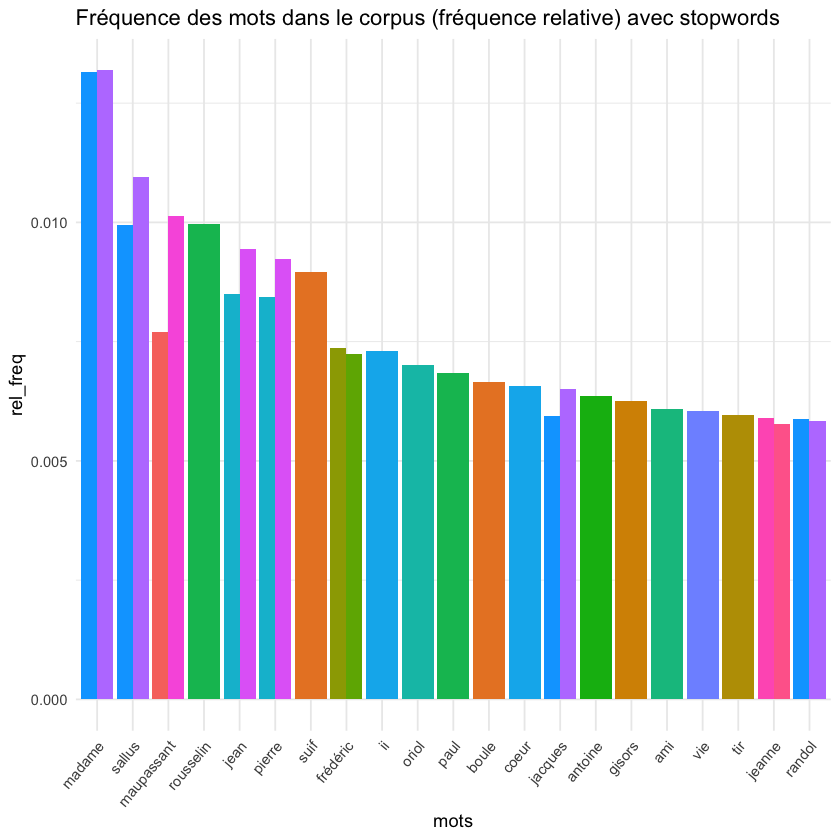

In [29]:
plot_count_rel <- ggplot(data = count_rel[1:30,],
                         aes(x = mots, y = rel_freq, fill = title)) +
  geom_histogram(stat = "identity", position = "dodge", show.legend = F) + 
  theme_minimal() +
  theme(legend.position="right")

plot_count_rel + theme(axis.text.x= element_text(angle = 50, hjust = 1)) + 
    labs(title = "Fréquence des mots dans le corpus (fréquence relative) avec stopwords")

==> Intéressant en termes d'importance de l'onomastique chez Maupassant et peut-être de manière plus générale dans le courant de la littérature réaliste / naturaliste.

## Statistiques descriptives :

   - Calcul du nombre de mots par oeuvre et visualisation.
   - Boxplot comparatif.

In [30]:
## Reshaping the data : colonnes = corpus, lignes = mots et freq
# Réf : https://stackoverflow.com/questions/19346066/r-re-arrange-dataframe-some-rows-to-columns

n2 <- as.matrix(xtabs(n~mots+title, count_rel))

## Order : 

freqs_format_hc <- n2[order(-n2[,1], n2[,1]),]
summary(colSums(freqs_format_hc))



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2486   19640   22610   25559   28963   85576 

==> Quelques infos intéressantes ici, qu'on peut visualiser autrement. Nous parle notamment de l'absence d'homogénéité de notre corpus.

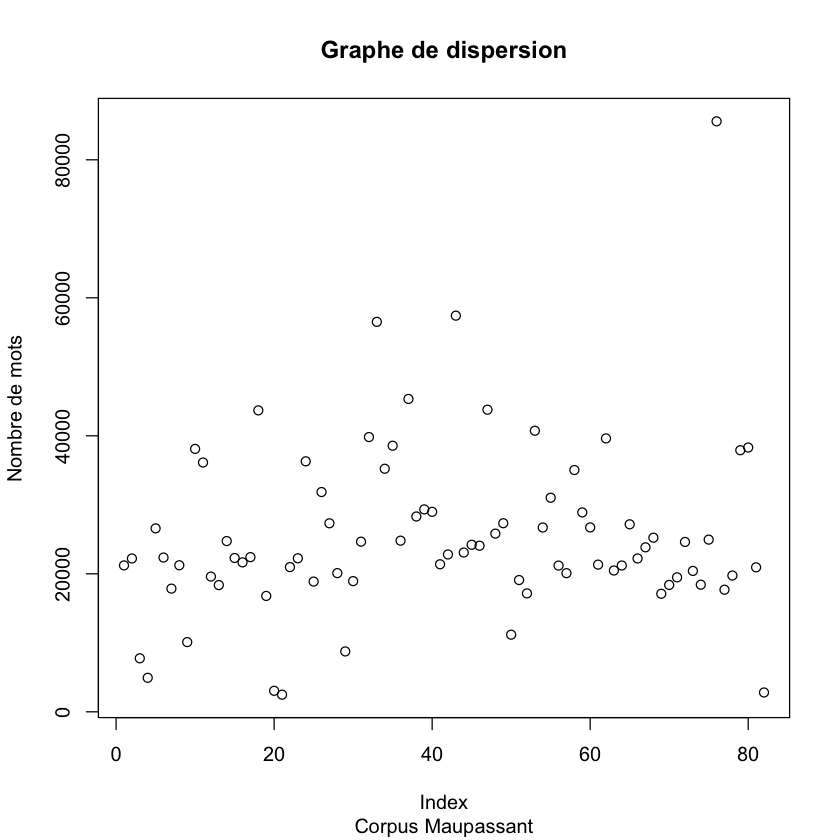

In [31]:
plot(colSums(freqs_format_hc), ylab = "Nombre de mots", main="Graphe de dispersion", sub="Corpus Maupassant", )

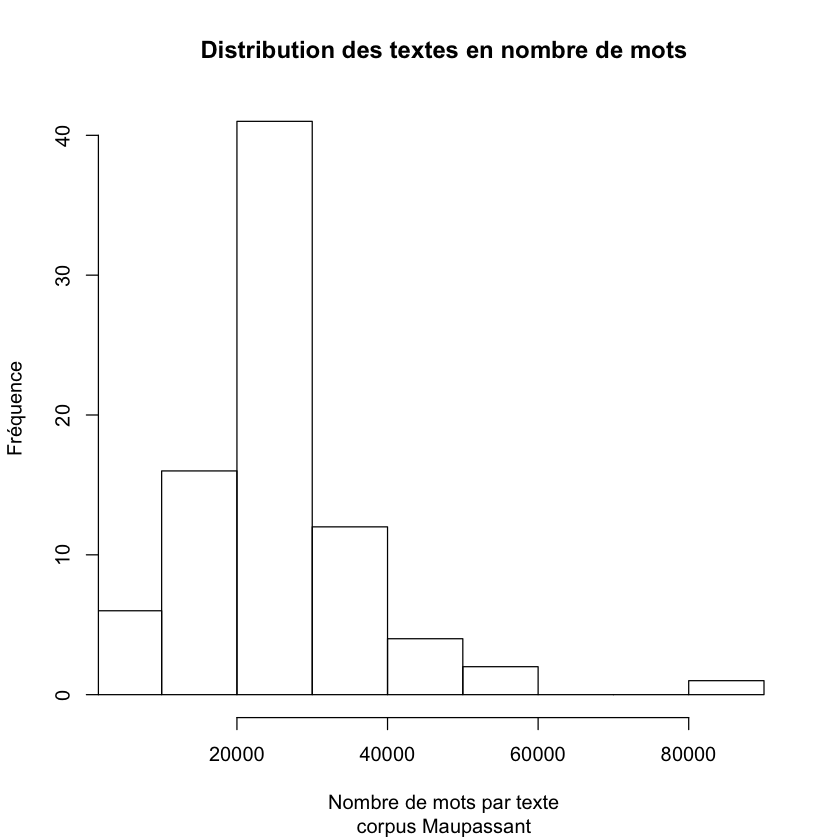

In [32]:
hist(colSums(freqs_format_hc), main = "Distribution des textes en nombre de mots", sub="corpus Maupassant", xlab = "Nombre de mots par texte", ylab = "Fréquence", xlim = c(5000, 90000))

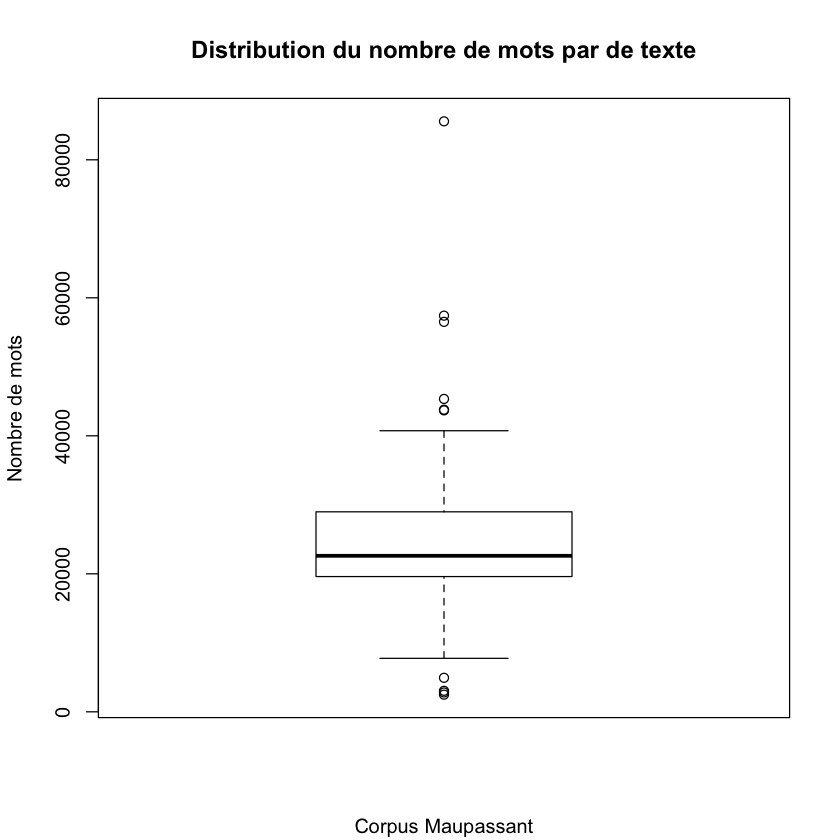

In [33]:
## Visualisation sous la forme de boîte à moustache : 

maBoite = boxplot(colSums(freqs_format_hc), main = "Distribution du nombre de mots par de texte", ylab="Nombre de mots", sub="Corpus Maupassant")

In [34]:
## Il serait intéressant et pertinent de le faire oeuvre par oeuvre.